In [1070]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif

print("Setup Complete")

Setup Complete


In [1001]:
chess_data_filename = 'my_chess_data.csv'
chess_data = pd.read_csv(chess_data_filename, index_col='Date', parse_dates = True)
len(chess_data)

15784

Text(0, 0.5, 'Date')

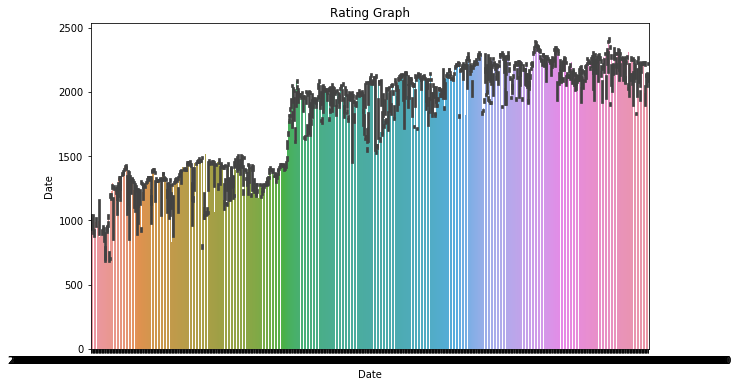

In [39]:
plt.figure(figsize=(10,6))
plt.title("Rating Graph")
sns.barplot(x=chess_data.index, y=chess_data['Player Rating'])
plt.ylabel("Date")

In [1002]:
total_games = chess_data.shape[0]
num_wins = chess_data[chess_data['Player Result'] == 'Win'].shape[0]
num_losses = chess_data[chess_data['Opponent Result'] == 'Win'].shape[0]
draws = chess_data[chess_data['Player Result'].str.contains('Draw')].shape[0]
insufficient_material = chess_data[chess_data['Player Result'] == 'Insufficient material'].shape[0]
stalemates = chess_data[chess_data['Player Result'] == 'Stalemate'].shape[0]
num_draws = draws + insufficient_material + stalemates
frequency_data_dict = {'total_games': total_games, 'num_wins': num_wins, 'num_losses': num_losses, 'num_draws': num_draws}
frequency_data_df = pd.DataFrame.from_records([frequency_data_dict], index='total_games')
frequency_data_df

,num_wins,num_losses,num_draws
total_games,,,
15784,7163,7976,645


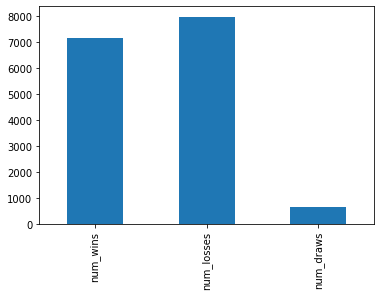

In [1003]:
frequency_data_df.iloc[0].plot.bar()


In [1004]:
chess_data['Rating Difference'] = chess_data['Opponent Rating'] - chess_data['Player Rating']
chess_data['Rating Difference']

Date
2013-07-24    192
2013-07-24     56
2013-07-24    179
2013-07-24    -70
2013-07-24   -141
             ... 
2020-07-19    126
2020-07-19     95
2020-07-19    145
2020-07-19     26
2020-07-19    138
Name: Rating Difference, Length: 15784, dtype: int64

In [1005]:
from sklearn import preprocessing

In [1071]:
label_enc = preprocessing.LabelEncoder()
termination = label_enc.fit_transform(list(chess_data['Player Result']))
opening_var = label_enc.fit_transform(list(chess_data['Variation']

TypeError: 'numpy.ndarray' object is not callable

In [1007]:
def unique(list1): 
    unique_list = []  
    for x in list1: 
        if x not in unique_list: 
            unique_list.append(x) 
    return unique_list

In [1008]:
chess_data['My_Result'] = termination
chess_data['My_Result']

Date
2013-07-24     7
2013-07-24     1
2013-07-24     7
2013-07-24     2
2013-07-24    10
              ..
2020-07-19    10
2020-07-19     9
2020-07-19     7
2020-07-19     2
2020-07-19     9
Name: My_Result, Length: 15784, dtype: int64

In [1009]:
chess_data['Opening_Variation'] = opening_var
chess_data['Opening_Variation']

Date
2013-07-24      65
2013-07-24     677
2013-07-24    1105
2013-07-24     906
2013-07-24     732
              ... 
2020-07-19     259
2020-07-19    1424
2020-07-19     503
2020-07-19    1769
2020-07-19     586
Name: Opening_Variation, Length: 15784, dtype: int64

In [1010]:
def format_time(num):
    if num.find('+') != -1:
        list = num.split('+')
        numA = float(list[0])
        numB = float(list[1])
        return numA + numB
    elif num.find('/') != -1:
        list = num.split('/')
        num = float(list[1])
        return num
    return float(num)
chess_data['Time Class'] = chess_data['Time Class'].apply(lambda l: format_time(l))
chess_data['Time Class'].astype(float)

Date
2013-07-24    1800.0
2013-07-24    1800.0
2013-07-24     600.0
2013-07-24     600.0
2013-07-24    1800.0
               ...  
2020-07-19     180.0
2020-07-19     180.0
2020-07-19     180.0
2020-07-19     180.0
2020-07-19     180.0
Name: Time Class, Length: 15784, dtype: float64

In [1011]:
label_encoder = preprocessing.LabelEncoder()
my_color = label_encoder.fit_transform(list(chess_data['Player Side']))
chess_data['Opening_Variation'].astype(float)
chess_data['Color'] = my_color

TypeError: 'numpy.ndarray' object is not callable

In [1012]:
my_color

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [1013]:
final_data = chess_data.loc[chess_data.index.year >= 2018]

Date
2013-07-24    White
2013-07-24    Black
2013-07-24    White
2013-07-24    Black
2013-07-24    Black
              ...  
2020-07-19    White
2020-07-19    White
2020-07-19    White
2020-07-19    White
2020-07-19    Black
Name: Player Side, Length: 15784, dtype: object

In [1015]:
features = ['Player Rating', 'Opponent Rating', 'Time Class', 'Rating Difference', 'Color', 'Opening_Variation', 'Moves']
pred = ['Termination']
chess_data.columns

Index(['Player', 'Player Rating', 'Player Nationality', 'Player Side',
       'Player Result', 'Player First Move', 'Opponent', 'Opponent Rating',
       'Opponent Nationality', 'Opponent Side', 'Opponent Result',
       'Opponent First Move', 'Opening', 'Variation', 'Termination', 'Moves',
       'Tournament', 'Event', 'Time Class', 'Time Control', 'FEN',
       'Rating Difference', 'My_Result', 'Opening_Variation'],
      dtype='object')

In [1018]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.2)

In [1019]:
model = KNeighborsClassifier(n_neighbors = 10)
model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [1020]:
model.score(x_test, y_test)

0.6285714285714286

In [1021]:
chess_data['Termination'].unique()

array(['badar1945 won by resignation', 'mikeofri101107 won by checkmate',
       'deschuter won by resignation', ..., 'AGW2016 won by checkmate',
       'SvenskWiking won by resignation', 'AndrewSamuelson won on time'],
      dtype=object)

In [1022]:
def change_termination(result):
    if result.find('Dontmesswithme_2') != -1:
        return 1
    elif result.find('draw') != -1:
        return 0
    else:
        return -1


In [1023]:
chess_data['Result'] = chess_data['Termination']

In [1024]:
chess_data['Result'] = chess_data['Result'].apply(lambda l: change_termination(l))

In [1025]:
chess_data['Result'].unique()

array([-1,  0,  1], dtype=int64)

In [1026]:
chess_data['Result']

Date
2013-07-24   -1
2013-07-24   -1
2013-07-24   -1
2013-07-24    0
2013-07-24    1
             ..
2020-07-19    1
2020-07-19   -1
2020-07-19   -1
2020-07-19    0
2020-07-19   -1
Name: Result, Length: 15784, dtype: int64

In [1027]:
pred = chess_data['Result']
chess_data['Result'].astype(float)
final_data = chess_data.loc[chess_data.index.year >= 2018]
final_data.columns
country = label_enc.fit_transform(list(final_data['Opponent Nationality']))
final_data['country'] = country
final_data['country']
final_data.columns


TypeError: 'numpy.ndarray' object is not callable

In [1028]:
features = ['Player Rating', 'Opponent Rating', 'Time Class', 'Rating Difference', 'Color', 'Moves', 'Opening_Variation', 'Move One']
final_data['Time Control'].unique()

array(['blitz', 'bullet', 'rapid', 'daily'], dtype=object)

In [1030]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
my_data = final_data.loc[final_data['Time Control'] != 'bullet']
my_data = my_data.loc[my_data['Time Control'] != 'daily']
my_data = my_data.loc[my_data['Player First Move'] == 'd4']
my_data = my_data.loc[my_data['Opponent'] != 'king_kunal']


In [1031]:
my_first_data = my_data.loc[my_data['Color'] == 1]
my_first_move = label_enc.fit_transform(list(my_first_data['Player First Move']))
opp_first_move = label_enc.fit_transform(list(my_first_data['Opponent First Move']))
my_first_data['Move One'] = my_first_move + opp_first_move

KeyError: 'Color'

In [1032]:
import numpy as np
X = np.array(my_first_data[features])
y = np.array(my_first_data['Result'])
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 1) 

In [1033]:
clf = DecisionTreeClassifier()
clf = clf.fit(train_X, train_y)
pred = clf.predict(test_X)

In [1034]:
print("Accuracy:",metrics.accuracy_score(test_y, pred))

Accuracy: 0.5644796380090498


In [1035]:
len(my_first_data)

4419

In [1036]:
my_second_data = final_data.loc[final_data['Time Control'] != 'bullet']
my_second_data = my_second_data.loc[my_second_data['Time Control'] != 'daily']
my_second_data = my_second_data.loc[my_second_data['Player First Move'] != 'e6']
my_second_data = my_second_data.loc[my_second_data['Opponent'] != 'wang5ter']
my_second_data = my_second_data.loc[my_second_data['Opponent'] != 'king_kunal']

my_second_data = my_second_data.loc[my_second_data['Color'] == 0]

KeyError: 'Color'

In [1037]:
my_second_data['Player First Move'].unique()
my_black_first_move = label_enc.fit_transform(list(my_second_data['Player First Move']))
his_white_first_move = label_enc.fit_transform(list(my_second_data['Opponent First Move']))
features = ['Player Rating', 'Opponent Rating', 'Time Class', 'Rating Difference', 'Color', 'Moves', 'Opening_Variation', 'Move One']
my_second_data['Move One'] = my_black_first_move + his_white_first_move
my_second_data = my_second_data.loc[my_second_data.index.year >= 2018]
my_second_data = my_second_data.loc[my_second_data['Player Rating'] >= 1300]

TypeError: 'numpy.ndarray' object is not callable

In [1038]:
f = np.array(my_second_data[features])
t = np.array(my_second_data['Result'])
tr_X, te_X, tr_y, te_y = train_test_split(f, t, test_size = 0.3, random_state = 1)
classifier = DecisionTreeClassifier()
classifier = classifier.fit(tr_X, tr_y)
pred_y = classifier.predict(te_X)
print("Accuracy:", metrics.accuracy_score(te_y, pred_y))

KeyError: "['Color', 'Move One'] not in index"

In [1039]:
my_second_data.columns

Index(['Player', 'Player Rating', 'Player Nationality', 'Player Side',
       'Player Result', 'Player First Move', 'Opponent', 'Opponent Rating',
       'Opponent Nationality', 'Opponent Side', 'Opponent Result',
       'Opponent First Move', 'Opening', 'Variation', 'Termination', 'Moves',
       'Tournament', 'Event', 'Time Class', 'Time Control', 'FEN',
       'Rating Difference', 'My_Result', 'Opening_Variation', 'Result'],
      dtype='object')

In [1040]:
my_second_data.head()

,Player,Player Rating,Player Nationality,Player Side,Player Result,Player First Move,Opponent,Opponent Rating,Opponent Nationality,Opponent Side,...,Moves,Tournament,Event,Time Class,Time Control,FEN,Rating Difference,My_Result,Opening_Variation,Result
Date,,,,,,,,,,,,,,,,,,,,,
2018-05-22,Dontmesswithme_2,1390,United States of America,White,Win,d4,Joashjoash,1382,United States of America,Black,...,22.0,None,Live Chess,180.0,blitz,r3rk2/pp4Q1/q3b3/3RB3/2p5/2P1P3/PPB2PPP/2K4R b...,-8,10,1768,1
2018-05-22,Dontmesswithme_2,1417,United States of America,Black,Win,Nf6,Joashjoash,1374,United States of America,White,...,44.0,None,Live Chess,180.0,blitz,B7/6k1/1p1p4/3Pp3/5n2/P3q3/1K6/8 w - -,-43,10,0,1
2018-05-22,Dontmesswithme_2,1389,United States of America,White,Resigned,d4,Chris_Rincon,1382,United States of America,Black,...,2.0,None,Live Chess,180.0,blitz,rnbqkbnr/pppppp1p/8/8/3P1p2/8/PPP1PPPP/RN1QKBN...,-7,7,1799,-1
2018-05-22,Dontmesswithme_2,1411,United States of America,White,Win,d4,marcosrodrigomuller,1348,Brazil,Black,...,9.0,None,Live Chess,180.0,blitz,r1bq1rk1/ppp2ppp/3b4/3pP2n/8/3BP1B1/PPPN1PPP/R...,-63,10,1769,1
2018-05-22,Dontmesswithme_2,1432,United States of America,Black,Win,a6,suriel62,1387,United States of America,White,...,28.0,None,Live Chess,180.0,blitz,r4rk1/1b2b1p1/p4p2/4pP2/2Pp4/7p/P3QNqP/2R2R1K ...,-45,10,1886,1


In [1041]:
plt.figure(figsize = (60, 6))
my_second_data['OpeningLine'] = my_second_data['Move One']
data_viz = chess_data
data_viz = data_viz.loc[data_viz.index.year > 2018]
data_viz['Actual Rating Category'] = data_viz['Player Rating'] - data_viz['Rating Difference']
data_viz['Actual Rating Category'].astype(float)
data_viz['Actual Rating Category'] = data_viz['Actual Rating Category']/100.0
data_viz['Actual Rating Category'] = data_viz['Actual Rating Category'].apply(lambda l: round(l))
sns.barplot(x = 'Actual Rating Category', y = 'Result', data = data_viz)

KeyError: 'Move One'

<Figure size 4320x432 with 0 Axes>

In [1042]:
len(data_viz['Actual Rating Category'].unique())

33

In [1043]:
win = chess_data.loc[chess_data['Result'] == 1]


In [1044]:
White_wins = win.loc[win['Color'] == 1]
White_wins = White_wins.loc[White_wins['Player First Move'] == 'd4']
White_wins = White_wins.loc[White_wins.index.year > 2018]

KeyError: 'Color'

In [1045]:
len(White_wins['Variation'].unique())

375

In [1046]:
len(White_wins['Opening'])

2097

In [1047]:
count = 0
for i in White_wins['Opening']:
    if i.find('London') != -1:
        count+=1
count

269

In [1048]:
k = 0
index = 0
for x in White_wins['Variation']:
    if x.find('Gambit Declined')!= -1:
        k+= 1 
print(k)


232


In [1049]:
265+232

497

In [1050]:
count = 0

for x in White_wins['Opening']:
    if x.find('London-System') != -1:
        count = count + 1
count

250

In [1051]:
def get_occ(x):
    count = 0
    for a in White_wins['Opening']:
        if a == x:
            count += 1
    return count

In [1052]:
list = White_wins['Opening'].unique()
most_occ = get_occ(list[0])
the_opening = list[0]
for l in list:
    if get_occ(l) > most_occ:
        most_occ = get_occ(l)
        the_opening = l
most_occ
the_opening

'https://www.chess.com/openings/Indian-Game'

In [1053]:
loss = chess_data.loc[chess_data['Result'] == -1]
loss = loss.loc[loss.index.year > 2018]
loss.head()
white_loss = loss.loc[loss['Color'] == 1]

KeyError: 'Color'

In [1054]:
white_loss.head()

,Player,Player Rating,Player Nationality,Player Side,Player Result,Player First Move,Opponent,Opponent Rating,Opponent Nationality,Opponent Side,...,Tournament,Event,Time Class,Time Control,FEN,Rating Difference,My_Result,Opening_Variation,Color,Result
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-03,Dontmesswithme_2,2138,United States of America,White,Timeout,d4,kaxadvalishvili,2135,Georgia,Black,...,None,Live Chess,180.0,blitz,8/p7/1p6/1P1k4/P7/3KPP2/8/8 w - -,-3,9,39,1,-1
2019-01-03,Dontmesswithme_2,2127,United States of America,White,Resigned,h3,nini2425,2015,Georgia,Black,...,None,Live Chess,300.0,blitz,rnbqkbnr/pppp1ppp/8/4p3/8/7P/PPPPPPP1/RNBQKBNR...,-112,7,1545,1,-1
2019-01-03,Dontmesswithme_2,2113,United States of America,White,Resigned,h3,RupeshReddy200,2236,India,Black,...,None,Live Chess,300.0,blitz,rnbqkbnr/pppp1ppp/8/4p3/8/7P/PPPPPPP1/RNBQKBNR...,123,7,1545,1,-1
2019-01-03,Dontmesswithme_2,2103,United States of America,White,Resigned,h3,RupeshReddy200,2246,India,Black,...,None,Live Chess,300.0,blitz,rnbqkbnr/pppp1ppp/8/4p3/8/7P/PPPPPPP1/RNBQKBNR...,143,7,1545,1,-1
2019-01-07,Dontmesswithme_2,1530,United States of America,White,Timeout,d4,Veljo10,1535,Croatia,Black,...,None,Live Chess,60.0,bullet,3Q4/1p6/8/4k1P1/p7/P7/1PPK1P2/8 w - -,5,9,1758,1,-1


In [1055]:
def get_occurence(x):
    count = 0
    for a in white_loss['Opening']:
        if a == x:
            count += 1
    return count

In [1056]:
list = white_loss['Opening'].unique()
most_occ = get_occurence(list[0])
the_opening = list[0]
for l in list:
    if get_occurence(l) > most_occ:
        most_occ = get_occ(l)
        the_opening = l
most_occ
the_opening

'https://www.chess.com/openings/Indian-Game'

In [1057]:
len(white_loss)


2494

In [1058]:
count = 0
for i in white_loss['Opening']:
    if i.find('Kings-Indian-Defense')!= -1:
        count+=1
count

137

In [1095]:
def getcolor(string):
    if string == 'White':
        return 1
    if string == 'Black':
        return 0
chess_data['Color'] = chess_data['Player Side']
chess_data['Color'] = chess_data['Color'].apply(lambda l: getcolor(l))


,Player,Player Rating,Player Nationality,Player Side,Player Result,Player First Move,Opponent,Opponent Rating,Opponent Nationality,Opponent Side,...,Tournament,Event,Time Class,Time Control,FEN,Rating Difference,My_Result,Opening_Variation,Result,Color
Date,,,,,,,,,,,,,,,,,,,,,
2013-07-24,Dontmesswithme_2,1048,United States of America,White,Resigned,e4,badar1945,1240,Pakistan,Black,...,None,Live Chess,1800.0,rapid,3kr3/5r2/1b6/4q3/6P1/3P1P2/6KP/8 w - -,192,7,65,-1,1
2013-07-24,Dontmesswithme_2,883,United States of America,Black,Checkmated,c5,mikeofri101107,939,United States of America,White,...,None,Live Chess,1800.0,rapid,4k1Q1/R6P/8/8/8/2B5/6K1/8 b - -,56,1,677,-1,0
2013-07-24,Dontmesswithme_2,1042,United States of America,White,Resigned,e4,deschuter,1221,United States of America,Black,...,None,Live Chess,600.0,blitz,r1bqkbr1/pppp1p2/5n1p/4p3/2B1P3/8/PPnP1PPP/RNB...,179,7,1105,-1,1
2013-07-24,Dontmesswithme_2,1014,United States of America,Black,Draw agreed,e5,chuchodomz,944,Mexico,White,...,None,Live Chess,600.0,blitz,r1b2r2/p1ppqpkp/1p3npb/P7/3P4/1NPBPN2/P3QPPP/R...,-70,2,906,0,0
2013-07-24,Dontmesswithme_2,981,United States of America,Black,Win,c5,Saladin_wise,840,Ukraine,White,...,None,Live Chess,1800.0,rapid,3k2nr/1p4pp/3P1p2/8/8/p7/2r5/1q2K3 w - -,-141,10,732,1,0


In [1100]:
final_data = chess_data
final_data = final_data.loc[final_data.index.year > 2018]
final_data.head(5)


,Player,Player Rating,Player Nationality,Player Side,Player Result,Player First Move,Opponent,Opponent Rating,Opponent Nationality,Opponent Side,...,Tournament,Event,Time Class,Time Control,FEN,Rating Difference,My_Result,Opening_Variation,Result,Color
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,Dontmesswithme_2,2105,United States of America,Black,Timeout,c5,chessrol,2166,United States of America,White,...,None,Live Chess,300.0,blitz,8/8/3p1kpb/4p1r1/1P1q3p/P4P1R/5Q2/4RK2 b - -,61,9,572,-1,0
2019-01-02,Dontmesswithme_2,1547,United States of America,Black,Win,e6,hrostam,1529,United States of America,White,...,None,Live Chess,60.0,bullet,8/7p/3P4/4P3/2PK1Pk1/prB3P1/R6P/8 w - -,-18,10,1828,1,0
2019-01-03,Dontmesswithme_2,2114,United States of America,Black,Win,Nf6,kaxadvalishvili,2159,Georgia,White,...,None,Live Chess,180.0,blitz,r1b2rk1/pp3p2/3pp1pb/2pP4/2P1P2q/1PNn2P1/PQ2N2...,45,10,1413,1,0
2019-01-03,Dontmesswithme_2,2123,United States of America,White,Win,d4,kaxadvalishvili,2150,Georgia,Black,...,None,Live Chess,180.0,blitz,8/8/p7/1pkp4/2p1q3/2P5/PP3R1P/5RK1 b - -,27,10,1769,1,1
2019-01-03,Dontmesswithme_2,2132,United States of America,Black,Win,Nf6,kaxadvalishvili,2141,Georgia,White,...,None,Live Chess,180.0,blitz,1r3rk1/4ppb1/p2p2p1/3Pn2n/4PN1P/P1NbBP2/1q1K2Q...,9,10,1411,1,0


In [1101]:
def get_data_splits(dataframe, valid_fraction=0.1):
    valid_fraction = 0.1
    valid_size = int(len(dataframe) * valid_fraction)

    train = dataframe[:-valid_size * 2]
    # valid size == test size, last two sections of the data
    valid = dataframe[-valid_size * 2:-valid_size]
    test = dataframe[-valid_size:]
    
    return train, valid, test


In [1102]:
final_data = final_data[['Player Rating', 'Opponent Rating', 'Rating Difference', 'Color', 'Opening_Variation', 'Time Class', 'Result']]
feature_cols = final_data.columns.drop('Result')

train, valid, _ = get_data_splits(final_data)

# Keep 5 features
selector = SelectKBest(f_classif, k=5)

X_new = selector.fit_transform(train[feature_cols], train['Result'])
X_new

array([[ 2.105e+03,  2.166e+03,  6.100e+01,  0.000e+00,  5.720e+02],
       [ 1.547e+03,  1.529e+03, -1.800e+01,  0.000e+00,  1.828e+03],
       [ 2.114e+03,  2.159e+03,  4.500e+01,  0.000e+00,  1.413e+03],
       ...,
       [ 2.253e+03,  2.235e+03, -1.800e+01,  0.000e+00,  8.180e+02],
       [ 2.244e+03,  2.215e+03, -2.900e+01,  1.000e+00,  1.088e+03],
       [ 2.251e+03,  2.197e+03, -5.400e+01,  1.000e+00,  1.269e+03]])

In [1103]:
selected_features = pd.DataFrame(selector.inverse_transform(X_new), 
                                 index=train.index, 
                                 columns=feature_cols)
selected_features.head()

,Player Rating,Opponent Rating,Rating Difference,Color,Opening_Variation,Time Class
Date,,,,,,
2019-01-02,2105.0,2166.0,61.0,0.0,572.0,0.0
2019-01-02,1547.0,1529.0,-18.0,0.0,1828.0,0.0
2019-01-03,2114.0,2159.0,45.0,0.0,1413.0,0.0
2019-01-03,2123.0,2150.0,27.0,1.0,1769.0,0.0
2019-01-03,2132.0,2141.0,9.0,0.0,1411.0,0.0


In [1104]:
selected_columns = selected_features.columns[selected_features.var() != 0]
valid[selected_columns].head()


,Player Rating,Opponent Rating,Rating Difference,Color,Opening_Variation
Date,,,,,
2020-04-27,2261,2352,91,0,410
2020-04-27,2253,2259,6,1,352
2020-04-27,2246,2311,65,0,67
2020-04-27,2254,2245,-9,1,1908
2020-04-27,2261,2223,-38,0,304


In [1106]:
X = valid[selected_columns]
y = np.array(valid['Result'])
train_X, test_X, train_y, test_y = train_test_split(f, t, test_size = 0.25, random_state = 1)
tree = DecisionTreeClassifier()
tree = tree.fit(train_X, train_y)
predict_y = classifier.predict(test_X)
print("Accuracy:", metrics.accuracy_score(test_y, predict_y))

Accuracy: 0.5719661335841957


In [1085]:
mychessdata = pd.read_csv(chess_data_filename, index_col='Date', parse_dates = True)


In [1090]:
def getcolor(string):
    if string == 'White':
        return 1
    if string == 'Black':
        return 0
    

,Player,Player Rating,Player Nationality,Player Side,Player Result,Player First Move,Opponent,Opponent Rating,Opponent Nationality,Opponent Side,...,Tournament,Event,Time Class,Time Control,FEN,Rating Difference,My_Result,Opening_Variation,Result,Color
Date,,,,,,,,,,,,,,,,,,,,,
2013-07-24,Dontmesswithme_2,1048,United States of America,White,Resigned,e4,badar1945,1240,Pakistan,Black,...,None,Live Chess,1800.0,rapid,3kr3/5r2/1b6/4q3/6P1/3P1P2/6KP/8 w - -,192,7,65,-1,1
2013-07-24,Dontmesswithme_2,883,United States of America,Black,Checkmated,c5,mikeofri101107,939,United States of America,White,...,None,Live Chess,1800.0,rapid,4k1Q1/R6P/8/8/8/2B5/6K1/8 b - -,56,1,677,-1,0
2013-07-24,Dontmesswithme_2,1042,United States of America,White,Resigned,e4,deschuter,1221,United States of America,Black,...,None,Live Chess,600.0,blitz,r1bqkbr1/pppp1p2/5n1p/4p3/2B1P3/8/PPnP1PPP/RNB...,179,7,1105,-1,1
2013-07-24,Dontmesswithme_2,1014,United States of America,Black,Draw agreed,e5,chuchodomz,944,Mexico,White,...,None,Live Chess,600.0,blitz,r1b2r2/p1ppqpkp/1p3npb/P7/3P4/1NPBPN2/P3QPPP/R...,-70,2,906,0,0
2013-07-24,Dontmesswithme_2,981,United States of America,Black,Win,c5,Saladin_wise,840,Ukraine,White,...,None,Live Chess,1800.0,rapid,3k2nr/1p4pp/3P1p2/8/8/p7/2r5/1q2K3 w - -,-141,10,732,1,0
